Experiment Number: 8

Roll No: C018

Student Name: Dhruvit Jain

Program/Branch/Sem: B.TECH ExTC Sem 7

Date of Performance: 05/09/2020

Date of Submission: 16/09/2020


Aim:To write a program in PYTHON to implement JPEG Baseline algorithm

Subject: MMSC

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
import random
from skimage import io
from skimage.color import rgb2gray

In [77]:
A=np.array([[183,160,94,153,194,163,132,165],
                    [183,153,116,176,187,166,130,169],
                    [179,168,171,182,179,170,131,167],
                    [177,177,179,177,179,165,131,167],
                    [178,178,179,176,182,164,130,171],
                    [179,180,180,179,183,164,130,171],
                    [179,179,180,182,183,170,129,173],
                    [180,179,181,179,181,170,130,169]])

In [78]:
q=np.array([[16,11,10,16,24,40,51,61],
                   [12,12,14,19,26,58,60,55],
                   [14,13,16,24,40,57,69,56],
                   [14,17,22,29,51,87,80,62],
                   [18,22,37,56,68,109,103,77],
                   [24,35,55,64,81,104,113,92],
                   [49,64,78,87,103,121,120,101],
                   [72,92,95,98,112,100,103,99]])

In [79]:
#level shifting
A = A-128

In [80]:
def dct2(a):
    return dct(dct(a,axis=0, norm='ortho'),axis=1,norm='ortho')

In [81]:
dct_mat = dct2(A)
dct_mat

array([[ 3.12375000e+02,  5.62483191e+01, -2.65839253e+01,
         1.65266446e+01,  7.91250000e+01, -6.01429036e+01,
         2.63002122e+01, -2.60890832e+01],
       [-3.77089704e+01, -2.75824618e+01,  1.27840983e+01,
         4.52455767e+01,  3.08014506e+01, -6.96043140e-01,
        -2.35596077e+01, -1.03477502e+01],
       [-1.97657477e+01, -1.76359420e+01,  9.55069895e+00,
         3.34644543e+01,  2.05447128e+01, -5.87613254e+00,
        -1.56683396e+01, -8.81500917e+00],
       [-1.12132603e+01, -7.40160016e+00,  9.40536024e+00,
         1.48335386e+01,  1.03444114e+01, -1.07465436e+01,
        -1.34322238e+01,  1.18437472e+00],
       [-5.62500000e+00,  7.57315567e-01,  5.90473840e+00,
         5.27487599e+00, -4.37500000e+00, -7.11024221e+00,
        -5.01650420e+00,  4.83312653e+00],
       [ 2.65744671e+00,  3.16791601e+00,  2.04494163e-01,
        -2.27382533e+00, -7.11651567e+00, -3.66843222e+00,
         5.68276854e-01,  2.46236087e+00],
       [ 2.91057878e+00,  4.994736

In [82]:
#quantized matrix
quant=np.divide(dct_mat,q).round().astype(int)
print(quant)

[[20  5 -3  1  3 -2  1  0]
 [-3 -2  1  2  1  0  0  0]
 [-1 -1  1  1  1  0  0  0]
 [-1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [83]:
def idct2(a):
    return idct(idct(a,axis=0, norm='ortho'),axis=1,norm='ortho')

In [84]:
idct_mat = idct2(quant).round().astype(int)
idct_mat

array([[3, 1, 0, 1, 3, 2, 1, 2],
       [3, 2, 1, 2, 3, 2, 1, 2],
       [3, 3, 3, 3, 3, 2, 1, 2],
       [3, 3, 3, 3, 4, 2, 1, 2],
       [3, 3, 4, 3, 4, 2, 1, 1],
       [3, 3, 4, 3, 4, 2, 1, 1],
       [4, 4, 4, 4, 4, 2, 1, 2],
       [4, 4, 4, 4, 4, 2, 1, 2]])

In [85]:
Ainv = idct_mat + 128
Ainv

array([[131, 129, 128, 129, 131, 130, 129, 130],
       [131, 130, 129, 130, 131, 130, 129, 130],
       [131, 131, 131, 131, 131, 130, 129, 130],
       [131, 131, 131, 131, 132, 130, 129, 130],
       [131, 131, 132, 131, 132, 130, 129, 129],
       [131, 131, 132, 131, 132, 130, 129, 129],
       [132, 132, 132, 132, 132, 130, 129, 130],
       [132, 132, 132, 132, 132, 130, 129, 130]])

In [86]:
MSE = np.square(np.subtract(Ainv,A)).mean() 
MSE

8732.828125

In [137]:
q=np.array([[16,11,10,16,24,40,51,61],
                   [12,12,14,19,26,58,60,55],
                   [14,13,16,24,40,57,69,56],
                   [14,17,22,29,51,87,80,62],
                   [18,22,37,56,68,109,103,77],
                   [24,35,55,64,81,104,113,92],
                   [49,64,78,87,103,121,120,101],
                   [72,92,95,98,112,100,103,99]])
def jpeg (A):
    #A = A-128
    dct_mat = dct2(A)
    quant=np.divide(dct_mat,q).round().astype(int)
    return quant

def invJPEG (A):
    Ainv = idct2(A).round().astype(int)
    #Ainv = Ainv + 128
    return Ainv


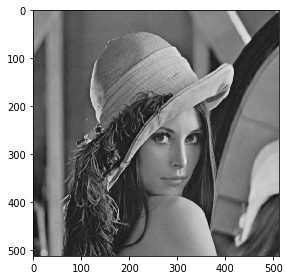

In [142]:
image_ori=io.imread('Lena.tif')
image=rgb2gray(image_ori)
io.imshow (image)


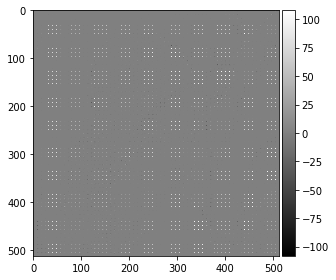

In [139]:
row,col = image.shape
image_quant = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_quant[r*8:(r+1)*8, c*8:(c+1)*8]=jpeg(image[r*8:(r+1)*8, c*8:(c+1)*8])
        
io.imshow (image_quant,cmap = 'gray')

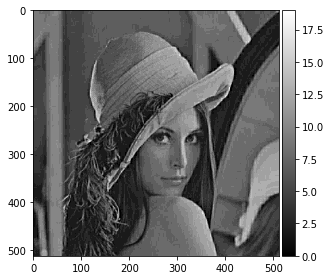

In [144]:
image_inv = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_inv[r*8:(r+1)*8, c*8:(c+1)*8]=invJPEG(image_quant[r*8:(r+1)*8, c*8:(c+1)*8])
        
io.imshow (image_inv,cmap = 'gray',vmin=0,vmax=None)

CONCLUSIONS:

JPEG is one of the most popular and comprehensive continuous tone, still frame compression standard. The compression is performed in three sequential steps: DCT computation, Quantization and variable length code assignment.
It does not handle bi-level (black and white) images very well.
It also works best on continuous-tone images, where adjacent pixels have similar colors. The JPEG decoder performs the reverse steps